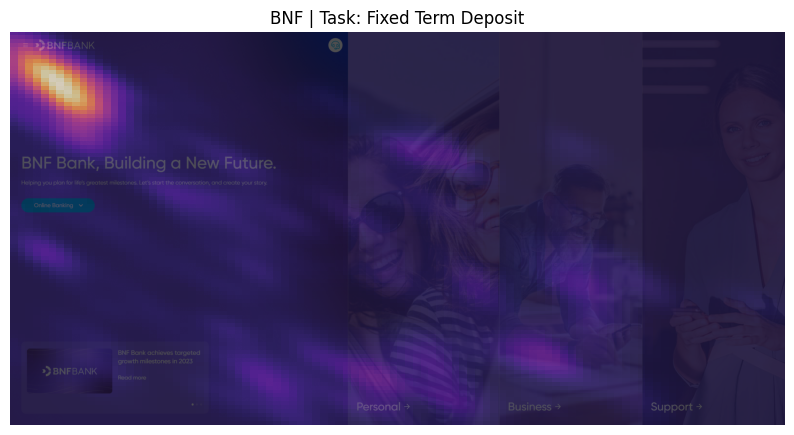

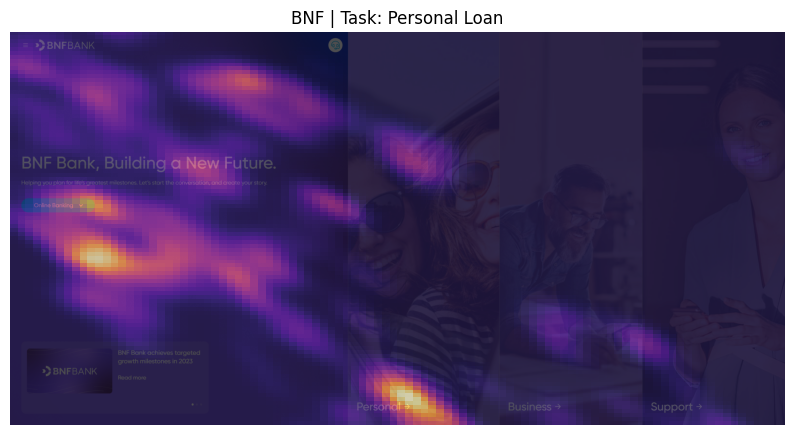

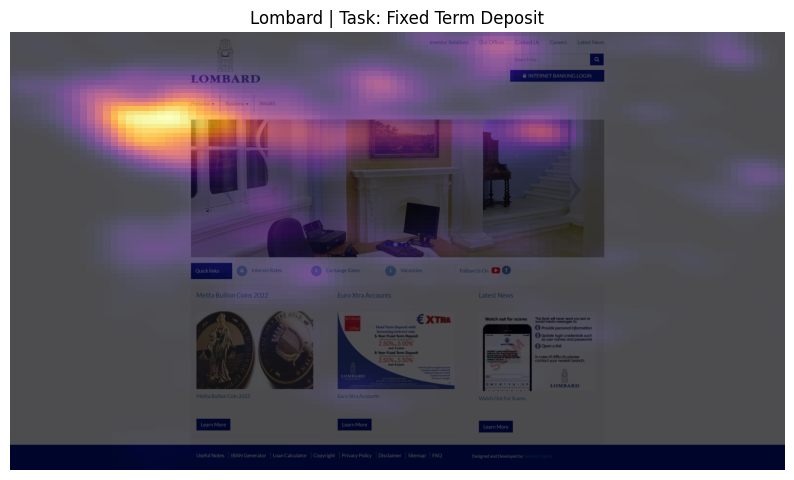

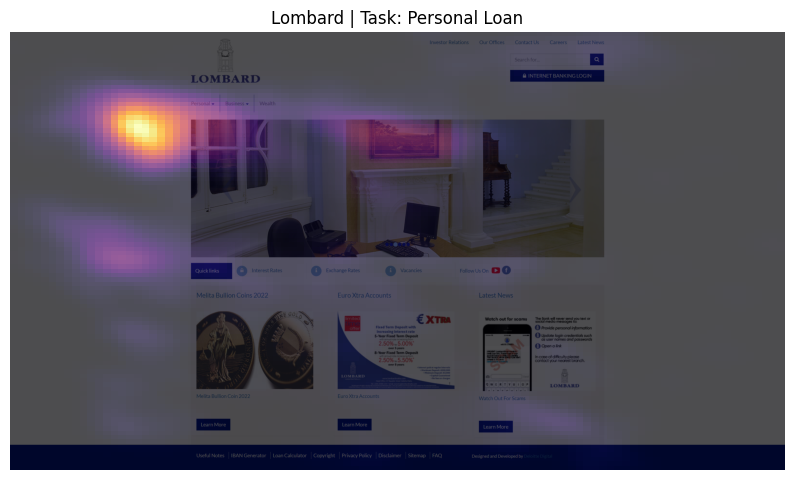

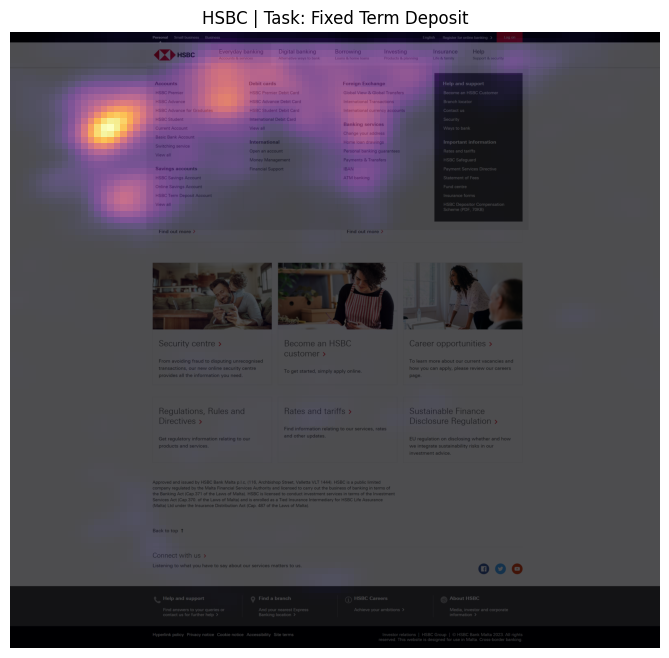

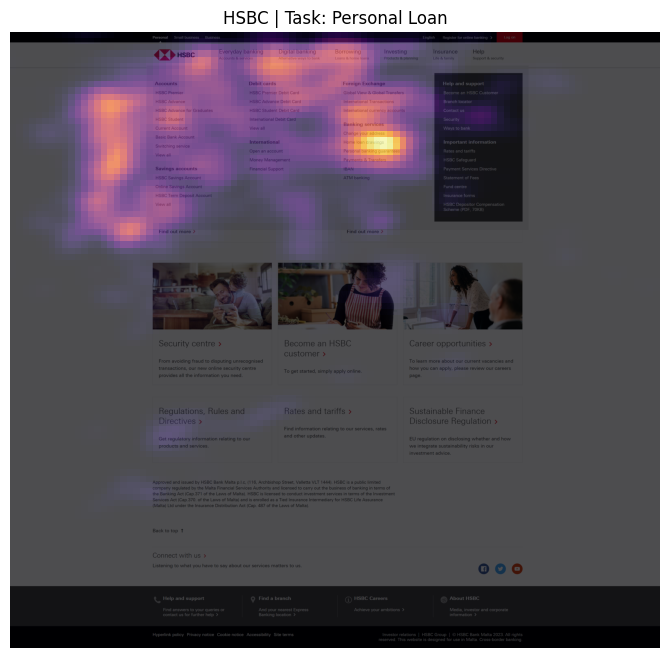

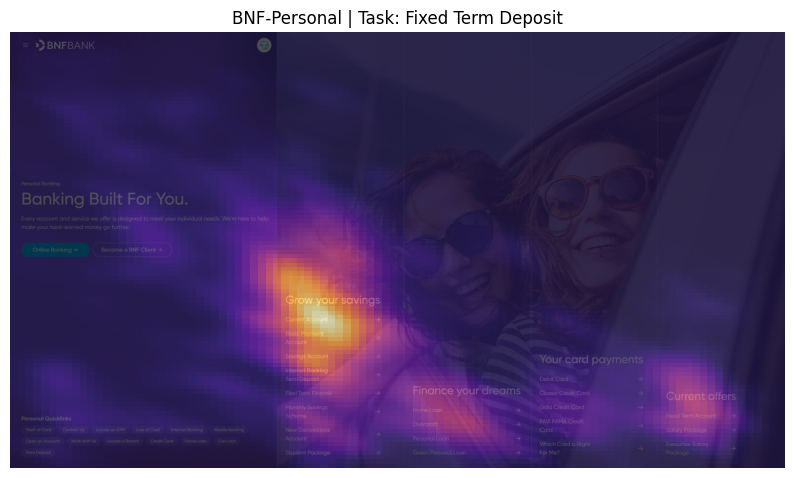

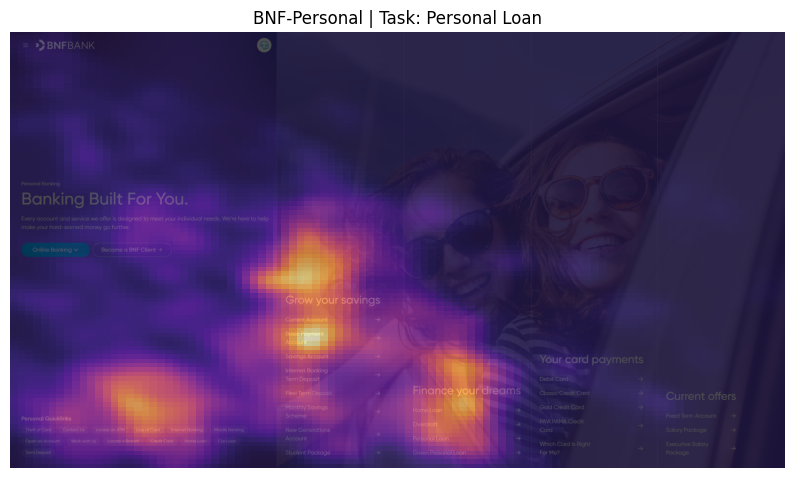

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import gaussian_kde

def load_data_from_json(json_path):
    with open(json_path, 'r') as f:
        data_list = json.load(f)
    return data_list

def plot_heatmap_on_image(data_list, img_path, website, task):
    img = Image.open(img_path)
    img_array = np.array(img)
    img_height, img_width = img_array.shape[:2]

    # Combine all data points from different arrays into a single list
    all_x = []
    all_y = []
    for data in data_list:
        x = [point['x'] for point in data]
        y = [point['y'] for point in data]
        y = [img_height - point for point in y]  # Invert y-coordinate to match image coordinate system
        all_x.extend(x)
        all_y.extend(y)

    # Perform kernel density estimation (KDE) to estimate the density function
    kde = gaussian_kde(np.vstack([all_x, all_y]), bw_method=0.1)  # Adjust the bandwidth parameter as needed

    # Create a grid of coordinates for evaluating the KDE
    x_grid, y_grid = np.meshgrid(np.linspace(0, img_width, 100), np.linspace(0, img_height, 100))
    positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
    density = np.reshape(kde(positions).T, x_grid.shape)

    # Plot heatmap on image with KDE density estimate
    plt.figure(figsize=(10, 8))
    plt.imshow(img_array, extent=[0, img_width, 0, img_height])
    plt.imshow(density, extent=[0, img_width, 0, img_height], origin='lower', cmap='inferno', alpha=0.7)
    plt.title(f"{website} | Task: {'Fixed Term Deposit' if task == 'FTD' else 'Personal Loan'}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('off')  # Hide axes for a cleaner look

    plt.savefig(f'heatmaps\\{website}-{task}.png')

    plt.show()

websites = ["BNF", "Lombard", "HSBC", "BNF-Personal"]
tasks = ["FTD", "PL"]
img_path = ""
json_path = ""

for website in websites:
    for task in tasks:
        if(website == "Lombard"):
            img_path = 'images\\https---www-lombardmalta-com-.png'
        elif(website == "BNF"):
            img_path = 'images\\https---www-bnf-bank-.png'
        elif(website == "HSBC"):
            img_path = 'images\\https---www-hsbc-com-mt-.png'

        json_path = f"outputs\\homepage\\{website}\\{task}\\data.json"
        
        if(website == "BNF-Personal"):
            img_path = "images\\https---www-bnf-bank-personal-.png"
            json_path = F"outputs\\submenu\\BNF\\{task}\\data.json"

        data_list = load_data_from_json(json_path)
        plot_heatmap_on_image(data_list, img_path, website, task)
